In [1]:
#core imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get dataframe

In [2]:
#make dataframe from csv
data = "australian_postcodes.csv" #Dataset downloaded from: 'https://www.matthewproctor.com/australian_postcodes'
aus_locations = pd.read_csv(data)
aus_locations.head()

,id,postcode,locality,state,long,lat,dc,type,status,sa3,sa3name,sa4,sa4name,region
0,230,200,ANU,ACT,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R1
1,21820,200,Australian National University,ACT,149.118900,-35.277700,NaN,NaN,Added 19-Jan-2020,NaN,NaN,NaN,NaN,R1
2,232,800,DARWIN,NT,130.836680,-12.458684,NaN,NaN,Updated 6-Feb-2020,70101.0,Darwin City,701.0,Darwin,R1
3,233,801,DARWIN,NT,130.836680,-12.458684,NaN,NaN,Updated 25-Mar-2020 SA3,70101.0,Darwin City,701.0,Darwin,R1
4,234,804,PARAP,NT,130.873315,-12.428017,NaN,NaN,Updated 25-Mar-2020 SA3,70102.0,Darwin Suburbs,701.0,Darwin,R1


In [3]:
#Extract areas pertaining to ACT and drop unnecessary features
canberra_locations = aus_locations[aus_locations['state'] == 'ACT'].drop(['id','dc', 'type', 'status', 'sa3', 'sa3name', 'sa4', 'sa4name', 'region'], axis=1)
canberra_locations.reset_index(drop=True, inplace=True)
canberra_locations

,postcode,locality,state,long,lat
0,200,ANU,ACT,0.000000,0.000000
1,200,Australian National University,ACT,149.118900,-35.277700
2,2540,HMAS CRESWELL,ACT,150.616440,-34.863483
3,2540,JERVIS BAY,ACT,150.616440,-34.863483
4,2600,BARTON,ACT,149.201072,-35.302911
...,...,...,...,...,...
154,2914,FORDE,ACT,149.125877,-35.170334
155,2914,HARRISON,ACT,149.125877,-35.170334
156,2914,JACKA,ACT,149.130428,-35.149517
157,2914,MONCRIEFF,ACT,149.116306,-35.158821


## Clean dataframe

In [4]:
#find values with lat/long == 0
null_values = canberra_locations[canberra_locations['long'] == 0]
null_values

,postcode,locality,state,long,lat
0,200,ANU,ACT,0.0,0.0
58,2610,CANBERRA BC,ACT,0.0,0.0
59,2610,CANBERRA MC,ACT,0.0,0.0
122,2901,TUGGERANONG DC,ACT,0.0,0.0


There are only 4 values in this dataframe which have null lat/long, so they can be dropped without significantly affectinmg the whole dataframe.

In [5]:
#drop null valued data points
canberra_locations.drop(null_values.index, inplace=True)

In [6]:
canberra_locations

,postcode,locality,state,long,lat
1,200,Australian National University,ACT,149.118900,-35.277700
2,2540,HMAS CRESWELL,ACT,150.616440,-34.863483
3,2540,JERVIS BAY,ACT,150.616440,-34.863483
4,2600,BARTON,ACT,149.201072,-35.302911
5,2600,CANBERRA,ACT,149.201072,-35.302911
...,...,...,...,...,...
154,2914,FORDE,ACT,149.125877,-35.170334
155,2914,HARRISON,ACT,149.125877,-35.170334
156,2914,JACKA,ACT,149.130428,-35.149517
157,2914,MONCRIEFF,ACT,149.116306,-35.158821


In [7]:
#combine localities with same postcode into one row with localities seperated by commas  

canberra_locations_flattened = canberra_locations.groupby(['postcode'])["locality"].apply(lambda item:', '.join(item)).reset_index()
canberra_locations_flattened

,postcode,locality
0,200,Australian National University
1,2540,"HMAS CRESWELL, JERVIS BAY"
2,2600,"BARTON, CANBERRA, CAPITAL HILL, DEAKIN, DEAKIN..."
3,2601,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY"
4,2602,"AINSLIE, DICKSON, DOWNER, HACKETT, LYNEHAM, O'..."
5,2603,"FORREST, GRIFFITH, MANUKA, RED HILL"
6,2604,"CAUSEWAY, KINGSTON, NARRABUNDAH"
7,2605,"CURTIN, GARRAN, HUGHES"
8,2606,"CHIFLEY, LYONS, O'MALLEY, PHILLIP, PHILLIP DC,..."
9,2607,"FARRER, ISAACS, MAWSON, PEARCE, TORRENS"


In [8]:
#re-insert coords by postcode
import pgeocode
nomi = pgeocode.Nominatim('AU')


canberra_locations_flattened["lat"] = canberra_locations_flattened['postcode'].apply(lambda x: nomi.query_postal_code(x).latitude)
canberra_locations_flattened["long"] = canberra_locations_flattened['postcode'].apply(lambda x: nomi.query_postal_code(x).longitude)
canberra_locations_flattened

,postcode,locality,lat,long
0,200,Australian National University,NaN,NaN
1,2540,"HMAS CRESWELL, JERVIS BAY",-35.1499,150.607384
2,2600,"BARTON, CANBERRA, CAPITAL HILL, DEAKIN, DEAKIN...",-35.3500,149.136533
3,2601,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",-35.2812,149.120400
4,2602,"AINSLIE, DICKSON, DOWNER, HACKETT, LYNEHAM, O'...",-35.2478,149.142357
5,2603,"FORREST, GRIFFITH, MANUKA, RED HILL",-35.3389,149.130900
6,2604,"CAUSEWAY, KINGSTON, NARRABUNDAH",-35.3149,149.147767
7,2605,"CURTIN, GARRAN, HUGHES",-35.3421,149.093567
8,2606,"CHIFLEY, LYONS, O'MALLEY, PHILLIP, PHILLIP DC,...",-35.3530,149.089717
9,2607,"FARRER, ISAACS, MAWSON, PEARCE, TORRENS",-35.3621,149.096960


In [9]:
#remove null value row
canberra_locations_flattened.dropna(inplace=True)
canberra_locations_flattened.reset_index(drop=True, inplace=True)
canberra_locations_flattened

,postcode,locality,lat,long
0,2540,"HMAS CRESWELL, JERVIS BAY",-35.1499,150.607384
1,2600,"BARTON, CANBERRA, CAPITAL HILL, DEAKIN, DEAKIN...",-35.3500,149.136533
2,2601,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",-35.2812,149.120400
3,2602,"AINSLIE, DICKSON, DOWNER, HACKETT, LYNEHAM, O'...",-35.2478,149.142357
4,2603,"FORREST, GRIFFITH, MANUKA, RED HILL",-35.3389,149.130900
5,2604,"CAUSEWAY, KINGSTON, NARRABUNDAH",-35.3149,149.147767
6,2605,"CURTIN, GARRAN, HUGHES",-35.3421,149.093567
7,2606,"CHIFLEY, LYONS, O'MALLEY, PHILLIP, PHILLIP DC,...",-35.3530,149.089717
8,2607,"FARRER, ISAACS, MAWSON, PEARCE, TORRENS",-35.3621,149.096960
9,2608,CIVIC SQUARE,-35.3100,149.193300


In [10]:
#check for any null values
canberra_locations_flattened.isnull().values.any()

False

In [11]:
#check shape 
canberra_locations_flattened.shape

(29, 4)

## Generate Folium Map

In [12]:
#import folium
import folium

In [13]:
#make map of canberra
canberra_coords = [-35.2809, 149.1300]
canberra_map = folium.Map(location=canberra_coords, zoom_start=11)

#function to generate markers (no clusters)
def generate_markers(data, area_map):
    for i in range(len(data.index) - 1):
        folium.CircleMarker(
            [data.iloc[i]["lat"], data.iloc[i]["long"]],
            radius=5,
            popup= f"{data.iloc[i]['locality']}",
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(area_map)

#generate markers for canberra_locations data
generate_markers(canberra_locations_flattened, canberra_map)

#show map
canberra_map

## Foursquare API

In [14]:
#API data
CLIENT_ID = 'input client id' # your Foursquare ID
CLIENT_SECRET = 'input client secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4XVJ0S1HQNRKRJMG5RK0Q3AV2WVJEJT40ZTU2CBLZAJCB5NI
CLIENT_SECRET:OJOP01FIQJIRBB4NGAX30R4ZAD0M3IO2PWGLEDFQRZBBR2GT


In [15]:
#get venues for each locality and make new dataframe
import requests, json
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
Canberra_venues = getNearbyVenues(names=canberra_locations_flattened['locality'],
                                   latitudes=canberra_locations_flattened['lat'],
                                   longitudes=canberra_locations_flattened['long']
                                  )

HMAS CRESWELL, JERVIS BAY
BARTON, CANBERRA, CAPITAL HILL, DEAKIN, DEAKIN WEST, DUNTROON, FAIRBAIRN RAAF, HARMAN, HMAS HARMAN, PARKES, PARLIAMENT HOUSE, RUSSELL, RUSSELL HILL, YARRALUMLA
ACTON, BLACK MOUNTAIN, CANBERRA, CITY
AINSLIE, DICKSON, DOWNER, HACKETT, LYNEHAM, O'CONNOR, WATSON
FORREST, GRIFFITH, MANUKA, RED HILL
CAUSEWAY, KINGSTON, NARRABUNDAH
CURTIN, GARRAN, HUGHES
CHIFLEY, LYONS, O'MALLEY, PHILLIP, PHILLIP DC, SWINGER HILL, WODEN
FARRER, ISAACS, MAWSON, PEARCE, TORRENS
CIVIC SQUARE
CANBERRA AIRPORT, CANBERRA INTERNATIONAL AIRPORT, FYSHWICK, MAJURA, PIALLIGO, SYMONSTON
CHAPMAN, COOMBS, DENMAN PROSPECT, DUFFY, FISHER, HOLDER, MOUNT STROMLO, PIERCES CREEK, RIVETT, STIRLING, URIARRA FOREST, URIARRA VILLAGE, WARAMANGA, WESTON, WESTON CREEK, WRIGHT
BRADDON, CAMPBELL, REID, TURNER
ARANDA, COOK, HAWKER, JAMISON CENTRE, MACQUARIE, PAGE, SCULLIN, WEETANGERA
CHARNWOOD, DUNLOP, FLOREY, FLYNN, FRASER, HIGGINS, HOLT, KIPPAX, KIPPAX CENTRE, LATHAM, MACGREGOR, MACNAMARA, MELBA, SPENCE, STRATH

In [17]:
Canberra_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",-35.2812,149.1204,Llewellyn Hall,-35.280604,149.123442,Concert Hall
1,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",-35.2812,149.1204,Group Seven Espresso,-35.281864,149.124639,Coffee Shop
2,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",-35.2812,149.1204,Palace Electric Cinema,-35.285014,149.123135,Multiplex
3,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",-35.2812,149.1204,Monster Kitchen and Bar,-35.285122,149.122547,Hotel Bar
4,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",-35.2812,149.1204,Mr Papa,-35.278550,149.122566,Food Truck


In [18]:
#how many venues for each locality?
Canberra_venues[['Neighbourhood', 'Venue']].groupby('Neighbourhood').count().sort_values('Venue', ascending=False)

,Venue
Neighbourhood,
"CAUSEWAY, KINGSTON, NARRABUNDAH",20
GUNGAHLIN,17
"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",14
"AINSLIE, DICKSON, DOWNER, HACKETT, LYNEHAM, O'CONNOR, WATSON",14
"BANKS, CONDER, GORDON",12
"CANBERRA AIRPORT, CANBERRA INTERNATIONAL AIRPORT, FYSHWICK, MAJURA, PIALLIGO, SYMONSTON",10
"FARRER, ISAACS, MAWSON, PEARCE, TORRENS",9
CIVIC SQUARE,7
"CHIFLEY, LYONS, O'MALLEY, PHILLIP, PHILLIP DC, SWINGER HILL, WODEN",6


In [19]:
#create one hot encoding dataframe for analysis
Canberra_onehot = pd.get_dummies(Canberra_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
Canberra_onehot['Neighbourhood'] = Canberra_venues['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [Canberra_onehot.columns[-1]] + list(Canberra_onehot.columns[:-1])
Canberra_onehot = Canberra_onehot[fixed_columns]

Canberra_onehot.head()

,Neighbourhood,Airport,Airport Lounge,Airport Service,Airport Terminal,Art Gallery,Asian Restaurant,Bakery,Bar,Bistro,...,Sports Bar,Sports Club,Supermarket,Taxi Stand,Tennis Court,Thai Restaurant,Toy / Game Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront
0,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#find mean occurances for each venue category in each neighbourhood 
Canberra_grouped = Canberra_onehot.groupby('Neighbourhood').mean().reset_index()
Canberra_grouped.head()

,Neighbourhood,Airport,Airport Lounge,Airport Service,Airport Terminal,Art Gallery,Asian Restaurant,Bakery,Bar,Bistro,...,Sports Bar,Sports Club,Supermarket,Taxi Stand,Tennis Court,Thai Restaurant,Toy / Game Store,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront
0,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,"AINSLIE, DICKSON, DOWNER, HACKETT, LYNEHAM, O'...",0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.071429,0.071429,0.0
2,"ARANDA, COOK, HAWKER, JAMISON CENTRE, MACQUARI...",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.333333,0.0
3,"BANKS, CONDER, GORDON",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.083333,...,0.0,0.083333,0.166667,0.0,0.0,0.0,0.083333,0.000000,0.000000,0.0
4,BELCONNEN,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.333333,...,0.0,0.333333,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [21]:
#find top 5 most frequent venue types for each neighbourhood

num_top_venues = 5

for hood in Canberra_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = Canberra_grouped[Canberra_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ACTON, BLACK MOUNTAIN, CANBERRA, CITY----
                venue  freq
0                Café  0.21
1               Hotel  0.14
2         Coffee Shop  0.14
3           Multiplex  0.07
4  Dim Sum Restaurant  0.07


----AINSLIE, DICKSON, DOWNER, HACKETT, LYNEHAM, O'CONNOR, WATSON----
                           venue  freq
0                   Liquor Store  0.07
1                  Grocery Store  0.07
2          Vietnamese Restaurant  0.07
3  Vegetarian / Vegan Restaurant  0.07
4                           Pool  0.07


----ARANDA, COOK, HAWKER, JAMISON CENTRE, MACQUARIE, PAGE, SCULLIN, WEETANGERA----
                   venue  freq
0  Vietnamese Restaurant  0.33
1                   Food  0.33
2         Shopping Plaza  0.33
3                Airport  0.00
4              Pet Store  0.00


----BANKS, CONDER, GORDON----
                  venue  freq
0  Fast Food Restaurant  0.17
1           Supermarket  0.17
2                Bistro  0.08
3   Fried Chicken Joint  0.08
4         Shopping Mall  0.0

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
num_top_venues = 5
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = Canberra_grouped['Neighbourhood']

for ind in np.arange(Canberra_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Canberra_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",Café,Hotel,Coffee Shop,History Museum,Italian Restaurant
1,"AINSLIE, DICKSON, DOWNER, HACKETT, LYNEHAM, O'...",Grocery Store,Bakery,Pool,Noodle House,Newsstand
2,"ARANDA, COOK, HAWKER, JAMISON CENTRE, MACQUARI...",Vietnamese Restaurant,Shopping Plaza,Food,Dim Sum Restaurant,Farmers Market
3,"BANKS, CONDER, GORDON",Fast Food Restaurant,Supermarket,Liquor Store,Sports Club,Sandwich Place
4,BELCONNEN,Bistro,Sports Club,Soccer Field,Waterfront,Farmers Market


In [24]:
neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",Café,Hotel,Coffee Shop,History Museum,Italian Restaurant
1,"AINSLIE, DICKSON, DOWNER, HACKETT, LYNEHAM, O'...",Grocery Store,Bakery,Pool,Noodle House,Newsstand
2,"ARANDA, COOK, HAWKER, JAMISON CENTRE, MACQUARI...",Vietnamese Restaurant,Shopping Plaza,Food,Dim Sum Restaurant,Farmers Market
3,"BANKS, CONDER, GORDON",Fast Food Restaurant,Supermarket,Liquor Store,Sports Club,Sandwich Place
4,BELCONNEN,Bistro,Sports Club,Soccer Field,Waterfront,Farmers Market


## K-means Clustering

In [25]:
from sklearn.cluster import KMeans

#find best k for the dataset using the elbow method
def best_k(X, cluster_number):
    # calculate distortion for a range of number of cluster
    distortions = []
    for i in range(1, cluster_number):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0
        )
        km.fit(X)
        distortions.append(km.inertia_)

    # plot
    plt.plot(range(1, cluster_number), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

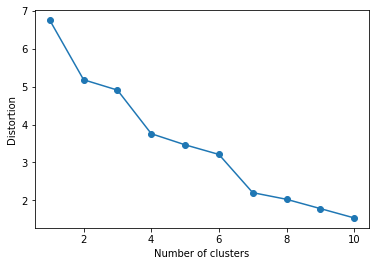

In [26]:
X = Canberra_grouped.drop('Neighbourhood', axis=1)
best_k(X, 11)

The elbow begins at approximately 4 clusters

In [27]:
kclusters = 6
X = Canberra_grouped.drop('Neighbourhood', axis=1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)

kmeans.labels_

array([1, 1, 1, 1, 1, 2, 0, 5, 1, 2, 1, 0, 1, 3, 1, 1, 1, 2, 1, 1, 4])

In [28]:
neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",Café,Hotel,Coffee Shop,History Museum,Italian Restaurant
1,"AINSLIE, DICKSON, DOWNER, HACKETT, LYNEHAM, O'...",Grocery Store,Bakery,Pool,Noodle House,Newsstand
2,"ARANDA, COOK, HAWKER, JAMISON CENTRE, MACQUARI...",Vietnamese Restaurant,Shopping Plaza,Food,Dim Sum Restaurant,Farmers Market
3,"BANKS, CONDER, GORDON",Fast Food Restaurant,Supermarket,Liquor Store,Sports Club,Sandwich Place
4,BELCONNEN,Bistro,Sports Club,Soccer Field,Waterfront,Farmers Market
5,"BRADDON, CAMPBELL, REID, TURNER",Bus Stop,Rugby Pitch,Park,Waterfront,Food Truck
6,"CANBERRA AIRPORT, CANBERRA INTERNATIONAL AIRPO...",Rental Car Location,Airport Lounge,Airport Service,Airport Terminal,Taxi Stand
7,"CASEY, FRANKLIN, GINNINDERRA VILLAGE, NGUNNAWA...",Lake,Waterfront,Garden Center,Farmers Market,Fast Food Restaurant
8,"CAUSEWAY, KINGSTON, NARRABUNDAH",Café,Thai Restaurant,Burger Joint,Italian Restaurant,Gastropub
9,"CHARNWOOD, DUNLOP, FLOREY, FLYNN, FRASER, HIGG...",Bus Stop,Waterfront,Dim Sum Restaurant,Farmers Market,Fast Food Restaurant


In [29]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Canberra_merged = canberra_locations_flattened

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Canberra_merged = Canberra_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='locality').reset_index(drop=True)


Canberra_merged # check the last columns!

,postcode,locality,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,2540,"HMAS CRESWELL, JERVIS BAY",-35.1499,150.607384,NaN,NaN,NaN,NaN,NaN,NaN
1,2600,"BARTON, CANBERRA, CAPITAL HILL, DEAKIN, DEAKIN...",-35.3500,149.136533,NaN,NaN,NaN,NaN,NaN,NaN
2,2601,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",-35.2812,149.120400,1.0,Café,Hotel,Coffee Shop,History Museum,Italian Restaurant
3,2602,"AINSLIE, DICKSON, DOWNER, HACKETT, LYNEHAM, O'...",-35.2478,149.142357,1.0,Grocery Store,Bakery,Pool,Noodle House,Newsstand
4,2603,"FORREST, GRIFFITH, MANUKA, RED HILL",-35.3389,149.130900,1.0,Café,Supermarket,Sports Club,Waterfront,Fried Chicken Joint
5,2604,"CAUSEWAY, KINGSTON, NARRABUNDAH",-35.3149,149.147767,1.0,Café,Thai Restaurant,Burger Joint,Italian Restaurant,Gastropub
6,2605,"CURTIN, GARRAN, HUGHES",-35.3421,149.093567,1.0,Farmers Market,Gym / Fitness Center,Skate Park,Park,Waterfront
7,2606,"CHIFLEY, LYONS, O'MALLEY, PHILLIP, PHILLIP DC,...",-35.3530,149.089717,1.0,Indian Restaurant,Sandwich Place,Pet Store,Liquor Store,Coffee Shop
8,2607,"FARRER, ISAACS, MAWSON, PEARCE, TORRENS",-35.3621,149.096960,1.0,Pizza Place,Bakery,Market,Sports Bar,Convenience Store
9,2608,CIVIC SQUARE,-35.3100,149.193300,0.0,Airport Lounge,Airport,Café,Sandwich Place,Rental Car Location


<AxesSubplot:>

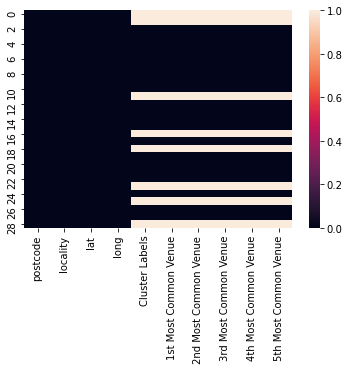

In [30]:
#handle nan columns



sns.heatmap(Canberra_merged.isnull())

In [31]:
Canberra_merged.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)

<AxesSubplot:>

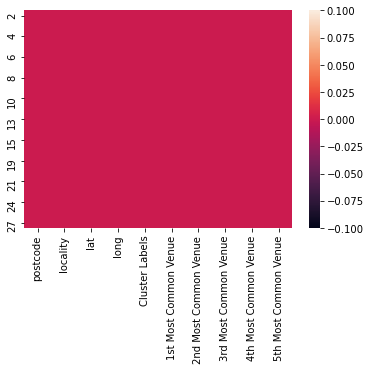

In [32]:
#re-check null values
sns.heatmap(Canberra_merged.isnull())

In [33]:
#convert cluster labels from float to int
Canberra_merged['Cluster Labels'] = Canberra_merged['Cluster Labels'].apply(np.int64)

Canberra_merged

,postcode,locality,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,2601,"ACTON, BLACK MOUNTAIN, CANBERRA, CITY",-35.2812,149.120400,1,Café,Hotel,Coffee Shop,History Museum,Italian Restaurant
3,2602,"AINSLIE, DICKSON, DOWNER, HACKETT, LYNEHAM, O'...",-35.2478,149.142357,1,Grocery Store,Bakery,Pool,Noodle House,Newsstand
4,2603,"FORREST, GRIFFITH, MANUKA, RED HILL",-35.3389,149.130900,1,Café,Supermarket,Sports Club,Waterfront,Fried Chicken Joint
5,2604,"CAUSEWAY, KINGSTON, NARRABUNDAH",-35.3149,149.147767,1,Café,Thai Restaurant,Burger Joint,Italian Restaurant,Gastropub
6,2605,"CURTIN, GARRAN, HUGHES",-35.3421,149.093567,1,Farmers Market,Gym / Fitness Center,Skate Park,Park,Waterfront
7,2606,"CHIFLEY, LYONS, O'MALLEY, PHILLIP, PHILLIP DC,...",-35.3530,149.089717,1,Indian Restaurant,Sandwich Place,Pet Store,Liquor Store,Coffee Shop
8,2607,"FARRER, ISAACS, MAWSON, PEARCE, TORRENS",-35.3621,149.096960,1,Pizza Place,Bakery,Market,Sports Bar,Convenience Store
9,2608,CIVIC SQUARE,-35.3100,149.193300,0,Airport Lounge,Airport,Café,Sandwich Place,Rental Car Location
10,2609,"CANBERRA AIRPORT, CANBERRA INTERNATIONAL AIRPO...",-35.3082,149.184620,0,Rental Car Location,Airport Lounge,Airport Service,Airport Terminal,Taxi Stand
12,2612,"BRADDON, CAMPBELL, REID, TURNER",-35.2712,149.138825,2,Bus Stop,Rugby Pitch,Park,Waterfront,Food Truck


## Generate map of clusters

In [34]:
#generate map with clusters
import matplotlib.cm as cm
import matplotlib.colors as colors

#generate map 
map_clusters = folium.Map(location=canberra_coords, zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Canberra_merged['lat'], Canberra_merged['long'], Canberra_merged['locality'], Canberra_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Veiw clusters individually

In [35]:
def weight_values(df):
    '''
        defines a function which weights the most popular venues by their position from 1st most common
        to 5th most common. 
    '''
    df['1st Most Common Venue'] = df['1st Most Common Venue'] * 5
    df['2nd Most Common Venue'] = df['2nd Most Common Venue'] * 4
    df['3rd Most Common Venue'] = df['3rd Most Common Venue'] * 3
    df['4th Most Common Venue'] = df['4th Most Common Venue'] * 2

In [36]:
c0 = Canberra_merged.loc[Canberra_merged['Cluster Labels'] == 0, Canberra_merged.columns[[1] + list(range(5, Canberra_merged.shape[1]))]]
c0_value_counts = c0.drop('locality', axis=1).apply(pd.Series.value_counts)

weight_values(c0_value_counts)
c0_value_counts.sum(axis=1).sort_values(ascending=False)

Airport Lounge         9.0
Rental Car Location    6.0
Airport                4.0
Café                   3.0
Airport Service        3.0
Sandwich Place         2.0
Airport Terminal       2.0
Taxi Stand             1.0
dtype: float64

In [37]:
c1 = Canberra_merged.loc[Canberra_merged['Cluster Labels'] == 1, Canberra_merged.columns[[1] + list(range(5, Canberra_merged.shape[1]))]]
c1_value_counts = c1.drop('locality', axis=1).apply(pd.Series.value_counts)

weight_values(c1_value_counts)
c1_value_counts.sum(axis=1).sort_values(ascending=False)

Café                     20.0
Supermarket              13.0
Sports Club               9.0
Liquor Store              9.0
Waterfront                8.0
Bakery                    8.0
Shopping Plaza            7.0
Farmers Market            7.0
Market                    6.0
Tennis Court              5.0
Bistro                    5.0
Grocery Store             5.0
Indian Restaurant         5.0
Vietnamese Restaurant     5.0
Fast Food Restaurant      5.0
Pharmacy                  5.0
Pizza Place               5.0
Sandwich Place            5.0
Hotel                     4.0
Thai Restaurant           4.0
Field                     4.0
Coffee Shop               4.0
Gym / Fitness Center      4.0
Ice Cream Shop            4.0
Noodle House              3.0
Soccer Field              3.0
Italian Restaurant        3.0
Skate Park                3.0
Pool                      3.0
Food                      3.0
Burger Joint              3.0
Pet Store                 3.0
Dim Sum Restaurant        2.0
Sports Bar

In [38]:
c2 = Canberra_merged.loc[Canberra_merged['Cluster Labels'] == 2, Canberra_merged.columns[[1] + list(range(5, Canberra_merged.shape[1]))]]
c2_value_counts = c2.drop('locality', axis=1).apply(pd.Series.value_counts)

weight_values(c2_value_counts)
c2_value_counts.sum(axis=1).sort_values(ascending=False)

Bus Stop                15.0
Waterfront               9.0
Rugby Pitch              4.0
Chinese Restaurant       4.0
Park                     3.0
Dim Sum Restaurant       3.0
Fast Food Restaurant     2.0
Farmers Market           2.0
Event Space              2.0
Food Truck               1.0
dtype: float64

In [39]:
c3 = Canberra_merged.loc[Canberra_merged['Cluster Labels'] == 3, Canberra_merged.columns[[1] + list(range(5, Canberra_merged.shape[1]))]]
c3_value_counts = c3.drop('locality', axis=1).apply(pd.Series.value_counts)

weight_values(c3_value_counts)
c3_value_counts.sum(axis=1).sort_values(ascending=False)

Soccer Field        5.0
Waterfront          4.0
Department Store    3.0
Event Space         2.0
Farmers Market      1.0
dtype: float64

In [40]:
c4 = Canberra_merged.loc[Canberra_merged['Cluster Labels'] == 4, Canberra_merged.columns[[1] + list(range(5, Canberra_merged.shape[1]))]]
c4_value_counts = c4.drop('locality', axis=1).apply(pd.Series.value_counts)

weight_values(c4_value_counts)
c4_value_counts.sum(axis=1).sort_values(ascending=False)

Event Space         5.0
Sculpture Garden    4.0
Waterfront          3.0
Department Store    2.0
Farmers Market      1.0
dtype: float64

In [41]:
c5 = Canberra_merged.loc[Canberra_merged['Cluster Labels'] == 5, Canberra_merged.columns[[1] + list(range(5, Canberra_merged.shape[1]))]]
c5_value_counts = c5.drop('locality', axis=1).apply(pd.Series.value_counts)

weight_values(c5_value_counts)
c5_value_counts.sum(axis=1).sort_values(ascending=False)

Lake                    5.0
Waterfront              4.0
Garden Center           3.0
Farmers Market          2.0
Fast Food Restaurant    1.0
dtype: float64